In [2]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The odeint solver requires a callable function representing the right hand side of the IVP. The following code defines the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. We set $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as the growth parameters.

In [1]:
def predator_prey(y, t):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    # Initialize paramters
    alpha = 1
    beta = .5
    delta = .75
    gamma = .25
    
    return (y[0]*(alpha-beta*y[1]),y[1]*(-delta+gamma*y[0]))

We now use odeint to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. The resulting rabbit and wolf populations over time (stored as columns in the output of odeint) is displayed on the same plot.

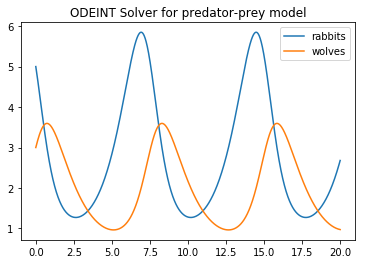

In [3]:
# initialize y0 and the time
y0 = np.array([5,3])
t = np.linspace(0,20,int(20/.0125)+1)

# Get the solution and plot it
sol = odeint(predator_prey,y0,t)
plt.plot(t,sol[:,0],label='rabbits')
plt.plot(t,sol[:,1],label='wolves')
plt.legend()
plt.title('ODEINT Solver for predator-prey model')
plt.show()

Similar to the basic predator prey model above, we define the function Lotka_volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using odeint, we solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. These three solutions are plotted on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

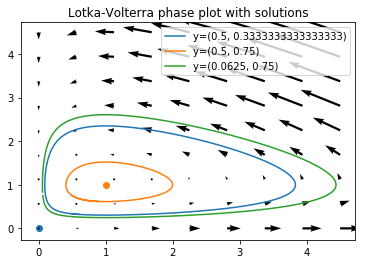

In [4]:
def Lotka_Volterra(y, t):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    # define eta according to the specs
    eta = 1/3
    
    # grab U and V from the initial conditions
    U = y[0]
    V = y[1]
    
    return (U*(1-V),eta*V*(U-1))

# Initialize the different initial conditions
y01 = np.array([1/2,1/3])
y02 = np.array([1/2,3/4])
y03 = np.array([1/16,3/4])

# make a list of the initial conditions to use in a for loop
ys = [(1/2,1/3),(1/2,3/4),(1/16,3/4)]

# initialize the time and a list of solutions
t3 = np.linspace(0,13,int(13/.0125)+1)
sols = []

# calculate the solutions for each initial condition
for y_initial in [y01,y02,y03]:
    sols.append(odeint(Lotka_Volterra,y_initial,t3))

# Plot each of the paths for each initial condition
for i in range(3):
    plt.plot(sols[i][:,0],sols[i][:,1],label=f'y={ys[i]}')

# plot the fixed points of the system
plt.scatter(0,0,marker='o')
plt.scatter(1,1,marker='o')


# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

plt.legend()
plt.title('Lotka-Volterra phase plot with solutions')
plt.show()

We now define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

We use odeint to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). This is done for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Finally, we create a phase portrait for the logistic equations using both sets of parameter values. The direction field, all equilibrium points, and both solution orbits are plotted on the same plot for each set of parameter values.

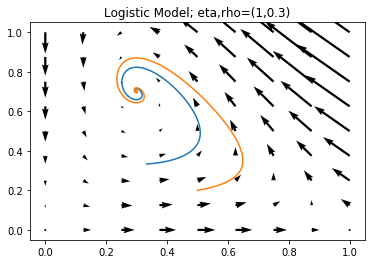

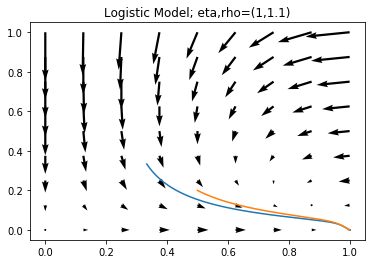

In [5]:
def Logistic_Model(y, t):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    return (y[0]*(1-y[0]-y[1]),eta*y[1]*(y[0]-rho))

# different pairs of eta and rho to use
eta_rho = [(1,.3),(1,1.1)]
y_ints = [np.array([1/3,1/3]),np.array([1/2,1/5])]

# define the time to run over
t4 = np.linspace(0,500,int(500/.0125)+1)


# Find the solution for each pair of eta and rho
for er in eta_rho:
    sols4 = []
    
    # Calculate the solution for each initial condition
    for initial in y_ints:
        eta,rho = er
        sols4.append(odeint(Logistic_Model,initial,t4))
    
    # plot the solutions
    for i in range(2):
        plt.plot(sols4[i][:,0],sols4[i][:,1])

    Y1, Y2 = np.meshgrid(np.linspace(0,1,25), np.linspace(0,1,25))
    dU, dV = Logistic_Model((Y1, Y2), 0)
    Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

    plt.title(f'Logistic Model; eta,rho=({eta},{rho})')
    plt.show()

We write the function forbes() which takes as input F(t) and returns Forbe’s equation. Next, we write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance. We use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), we define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

In [79]:
# Define constants 
pF = 9400
pL = 1800
etaF = 180
etaL = 230
gammaF = 3.2
gammaL = 22
beta_at = .14


C = 10.4*pL/pF

# Define K, forbes, and energy_balance as lambda functions
K = lambda F,L: ((1/PAL)-beta_at)*EI - gammaF*F-gammaL*L
forbes = lambda F: C / (C+F)

# Compute eq 1.8
def energy_balance(F,L):
    top = ((1/PAL)-beta_at)*EI - K1 - gammaF*F - gammaL*L
    bottom = (etaF/pF)*(1-p)+(etaL/pL)*p+(1/PAL)
    return top/bottom

In [61]:
def weight_odesystem(y,t):
    """
    Return the right hand side of eq (1.4) a a tuple
    Parameters:
            y (ndarray): contains current fat and lean weights
            t (float): current time 
    """
    # get fat and lean weights
    F = y[0]
    L = y[1]
    
    # compute EB and p(t)
    p = forbes(F)
    EB = energy_balance(F,L)
    
    # define the change in F and change in L
    dF = ((1-p)*EB)/pF
    dL = (p*EB)/pL
    
    return (dF,dL)

Consider the initial value problem,

$\frac{dF}{dt} = \frac{(1−p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW − F_0$.

Suppose a 38 year old female, standing 5’8” and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


We use the original intake and phyical activity levels to compute K for this system. Then we use odeint to solve the IVP. The solution curve for this single-stage weightloss intervention is graphed over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

In [8]:
# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

In [70]:
# Initialize body weight, height, and age according to problem 5
BW = 72.5748
H = 1.7272
age = 38
PAL = 1.4
p = forbes(F0)

# Get initial fat and lean levels
F0 = fat_mass(BW,age,H,'female')
L0 = BW - F0

In [69]:
F0,L0

(22.38708872958432, 50.187711270415676)

In [80]:
# Calculate K based on original PAL and EI
PAL = 1.4
EI = 2143
K1 = K(F0,L0)

In [81]:
# Change PAL and EI to model how much weight will be lost
PAL = 1.5
EI = 2025

In [82]:
# initialize the time
t = np.linspace(0,5*365,5*365)

# Calculate the solution
sol = odeint(weight_odesystem,np.array([F0,L0]),t)

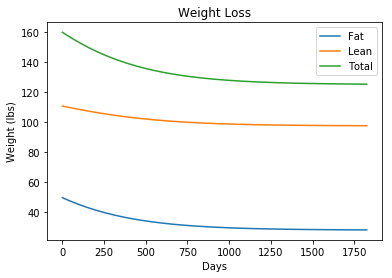

In [84]:
# Plot the fat, lean, and total weight
plt.plot(t,2.205*sol[:,0],label='Fat')
plt.plot(t,2.205*sol[:,1],label='Lean')
plt.plot(t,2.205*(sol[:,0]+sol[:,1]),label='Total')

plt.title("Weight Loss")
plt.xlabel("Days")
plt.ylabel("Weight (lbs)")
plt.legend()
plt.show()

Here, we modify the preceding weightloss problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

This requires us to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. We find and graph the solution curve over the 32 week period.

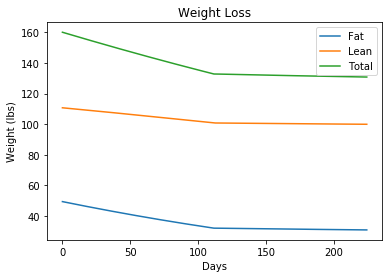

In [88]:
# Get initial fat and lean
F0 = fat_mass(BW,age,H,'female')
L0 = BW - F0

# Calculate K based on original PAL and EI
PAL = 1.4
EI = 2143
K1 = K(F0,L0)

# Define PAL, EI for first 16 weeks, and calculate weight loss over that time
PAL = 1.7
EI = 1600
t = np.linspace(0,16*7,16*7)
sol1 = odeint(weight_odesystem,np.array([F0,L0]),t)

# Define PAL, EI for next 16 weeks, grabbing new initial fat and lean, and calculate weight loss for next 16 weeks
PAL = 1.5
EI  = 2025
F0 = sol1[-1,0]
L0 = sol1[-1,1]
sol2 = odeint(weight_odesystem,np.array([F0,L0]),t)

# Join the two 16 week solutions together
sol = np.concatenate((sol1,sol2),axis=0)

# Plot the weight change over the full 32 weeks
t = np.linspace(0,32*7,32*7)
plt.plot(t,2.205*sol[:,0],label='Fat')
plt.plot(t,2.205*sol[:,1],label='Lean')
plt.plot(t,2.205*(sol[:,0]+sol[:,1]),label='Total')

# Set axis labels and title
plt.xlabel('Days')
plt.ylabel('Weight (lbs)')
plt.title('Weight Loss')
plt.legend()
plt.show()
